## Effect of the sample size in cross-validation

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100  # rescale the target in k$

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
regressor = DecisionTreeRegressor()

## Learning curve

In [5]:
import numpy as np

In [8]:
train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [9]:
from sklearn.model_selection import ShuffleSplit

In [10]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)

In [11]:
from sklearn.model_selection import learning_curve

In [12]:
results = learning_curve(
    regressor, data, target, train_sizes=train_sizes, cv=cv,
    scoring="neg_mean_absolute_error", n_jobs=2)
train_size, train_scores, test_scores = results[:3]
# Convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

In [13]:
import matplotlib.pyplot as plt

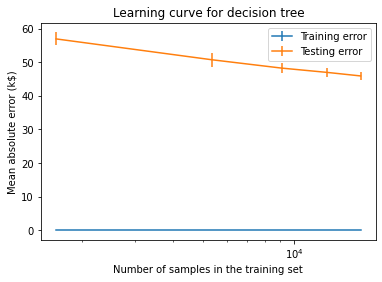

In [14]:
plt.errorbar(train_size, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training error")
plt.errorbar(train_size, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label="Testing error")
plt.legend()

plt.xscale("log")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Learning curve for decision tree")

## Summary

In the notebook, we learnt:

* the influence of the number of samples in a dataset, especially on the
  variability of the errors reported when running the cross-validation;
* about the learning curve that is a visual representation of the capacity
  of a model to improve by adding new samples.